In [7]:
%pip install alpaca-py
%pip install pandas
%pip install numpy
%pip install seaborn
%pip install matplotlib
%pip install scipy
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Using cached statsmodels-0.14.4-cp312-cp312-macosx_10_13_x86_64.whl.metadata (9.2 kB)
  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
Using cached statsmodels-0.14.4-cp312-cp312-macosx_10_13_x86_64.whl (10.2 MB)
Using cached patsy-1.0.1-py2.py3-none-any.whl (232 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [statsmodels] [statsmodels]
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Alpaca-py imports
from alpaca.data.historical import StockHistoricalDataClient, OptionHistoricalDataClient
from alpaca.trading.client import TradingClient
from alpaca.data.requests import StockBarsRequest, OptionBarsRequest
from alpaca.data.timeframe import TimeFrame, TimeFrameUnit
import numpy as np
import pandas as pd
# =============================================================================
# Alpaca Data Handler
# =============================================================================
class AlpacaDataHandler:
    """
    Fetches underlying historical data from Alpaca.
    """
    def __init__(self):
        self.stock_client = StockHistoricalDataClient(
            api_key="PKVG4YA9NJEB5ZTPH9IV",
            secret_key="N6pUrWJXqS9asyYlvJ089Inpvs7U8UfufkQftkDt",
        )

    def get_historical_data(self, ticker: str, start: str, end: str, timeframe: TimeFrame) -> pd.DataFrame:
        start_dt = start
        end_dt = end

        req = StockBarsRequest(
            symbol_or_symbols=[ticker],
            timeframe=timeframe,
            start=start_dt,
            end=end_dt
        )
        bars_dict = self.stock_client.get_stock_bars(req)
        if ticker != bars_dict[ticker][0].symbol or len(bars_dict[ticker]) == 0:
            raise ValueError(f"No daily bars returned for {ticker}")

        def mapBarToDict(x):
            return {
                'symbol': x.symbol,
                'timestamp': x.timestamp,
                'open': x.open,
                'high': x.high,
                'low': x.low,
                'close': x.close,
                'volume': x.volume,
            }
        df = pd.DataFrame(map(mapBarToDict, bars_dict[ticker]))
        df.set_index('timestamp', inplace=True)
        df.sort_index(inplace=True)
        df.rename(columns={
            'open': 'Open',
            'high': 'High',
            'low': 'Low',
            'close': 'Close',
            'volume': 'Volume'
        }, inplace=True)

        return df

In [ ]:
data_handler = AlpacaDataHandler()
tickers = ["AAPL","MSFT","HOOD"]

start_date = "2025-01-01"
end_date = "2025-04-30"

timeframe = TimeFrame.Day

for ticker in tickers:
    df = data_handler.get_historical_data(ticker, start_date, end_date, timeframe)
    print(df)

# Write everything to one CSV file



                          symbol     Open      High       Low   Close  \
timestamp                                                               
2025-01-02 05:00:00+00:00   AAPL  248.930  249.1000  241.8201  243.85   
2025-01-03 05:00:00+00:00   AAPL  243.360  244.1800  241.8900  243.36   
2025-01-06 05:00:00+00:00   AAPL  244.310  247.3300  243.2000  245.00   
2025-01-07 05:00:00+00:00   AAPL  242.980  245.5500  241.3500  242.21   
2025-01-08 05:00:00+00:00   AAPL  241.920  243.7123  240.0500  242.70   
...                          ...      ...       ...       ...     ...   
2025-04-23 04:00:00+00:00   AAPL  206.000  208.0000  202.7990  204.60   
2025-04-24 04:00:00+00:00   AAPL  204.890  208.8299  202.9400  208.37   
2025-04-25 04:00:00+00:00   AAPL  206.365  209.7500  206.2000  209.28   
2025-04-28 04:00:00+00:00   AAPL  210.000  211.5000  207.4600  210.14   
2025-04-29 04:00:00+00:00   AAPL  208.693  212.2400  208.3700  211.21   

                               Volume  
timestamp 

Draw a histogram of the daily returns of AAPL

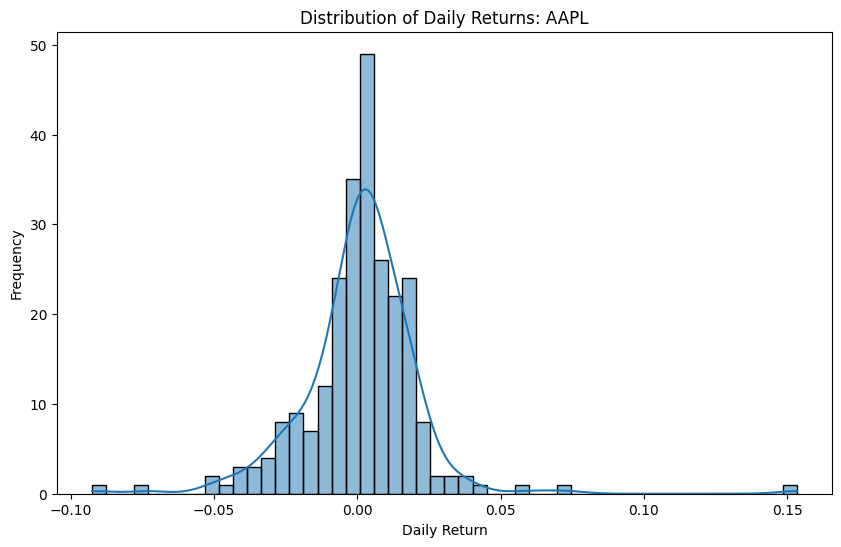

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('stock_data.csv', parse_dates=['timestamp'])

# Filter for AAPL
aapl = df[df['symbol'] == 'AAPL'].sort_values('timestamp')

# Calculate daily returns
aapl['daily_return'] = aapl['close'].pct_change()

# Plot the distribution of daily returns
plt.figure(figsize=(10, 6))
sns.histplot(aapl['daily_return'].dropna(), bins=50, kde=True)
plt.title('Distribution of Daily Returns: AAPL')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

Now calculate the skewness and kurtosis of the daily returns of AAPL

Skewness: 1.0218
Kurtosis: 13.9475


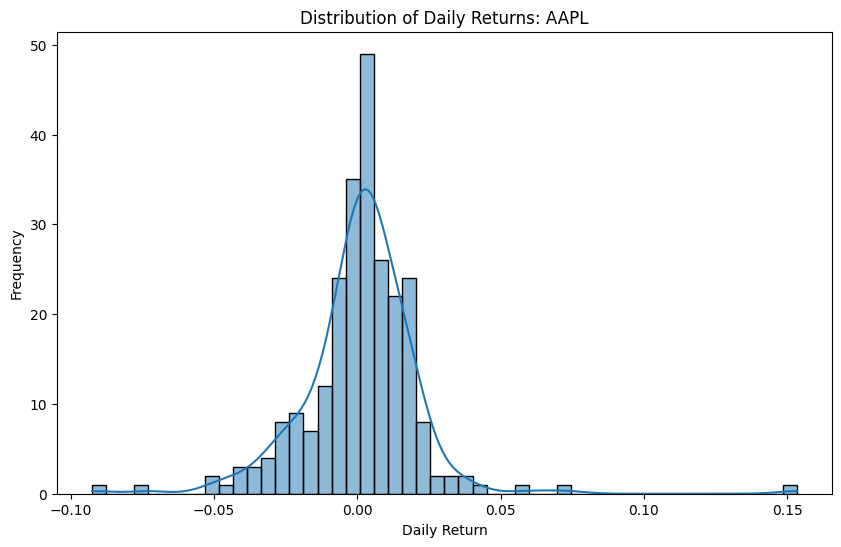

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('stock_data.csv', parse_dates=['timestamp'])

# Filter for AAPL and sort by date
aapl = df[df['symbol'] == 'AAPL'].sort_values('timestamp')

# Calculate daily returns
aapl['daily_return'] = aapl['close'].pct_change()

# Calculate skewness and kurtosis
skewness = aapl['daily_return'].skew()
kurtosis = aapl['daily_return'].kurtosis()

print(f"Skewness: {skewness:.4f}")
print(f"Kurtosis: {kurtosis:.4f}")

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(aapl['daily_return'].dropna(), bins=50, kde=True)
plt.title('Distribution of Daily Returns: AAPL')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

Now draw a skew-t distribution of the daily returns of AAPL

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.sandbox.distributions.extras import skewt

# Load and prepare data
df = pd.read_csv('stock_data.csv', parse_dates=['timestamp'])
aapl = df[df['symbol'] == 'AAPL'].sort_values('timestamp')
aapl['daily_return'] = aapl['close'].pct_change()
returns = aapl['daily_return'].dropna()

# Calculate sample statistics
skewness = returns.skew()
kurtosis = returns.kurtosis()
mean = returns.mean()
std = returns.std()

print(f"Skewness: {skewness:.4f}")
print(f"Kurtosis: {kurtosis:.4f}")

# Fit a skew-t distribution to the data
# The skewt.fit returns: shape (a), loc, scale, df
params = skewt.fit(returns)
a, loc, scale, df = params

print(f"a: {a}")
print(f"loc: {loc}")
print(f"scale: {scale}")
print(f"df: {df}")

# Plot histogram and KDE
plt.figure(figsize=(10, 6))
sns.histplot(returns, bins=50, kde=True, stat='density', label='AAPL Returns', color='skyblue')

# Overlay skew-t PDF
x = np.linspace(returns.min(), returns.max(), 500)
plt.plot(x, skewt.pdf(x, a, loc, scale, df), 'r-', lw=2, label='Fitted Skew-t PDF')

plt.title('AAPL Daily Returns with Fitted Skew-t Distribution')
plt.xlabel('Daily Return')
plt.ylabel('Density')
plt.legend()
plt.show()